# Broker Dealer Series

We will propose a relevant and exhaustive market risk analysis of a Broker Dealer LPL Financial Holdings Inc.

## 1. Import Libraries

In [1]:
! pip install numba
import yfinance as yf
import pandas as pd
import numpy as np
import Series_Functions as sf
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

sns.set(rc={"figure.figsize":(15, 8)},style="whitegrid")
plt.rcParams['font.family'] = 'serif'

## 2. Download the Data

In [2]:
# This is the ticker we choose to analyze
ticker = 'LPLA'
# We use the function get_data to get the data from Yahoo Finance
prices = sf.get_data(ticker)

We compute the returns using the function get_returns from Series_Functions package.

In [3]:
returns = sf.get_returns(prices)

In [4]:
returns.head()

Date
2010-11-19 00:00:00-05:00    0.013997
2010-11-22 00:00:00-05:00   -0.012270
2010-11-23 00:00:00-05:00    0.017392
2010-11-24 00:00:00-05:00    0.005494
2010-11-26 00:00:00-05:00   -0.001214
Name: Close, dtype: float64

We plot the returns for the Broker Dealer using the function plot_returns.

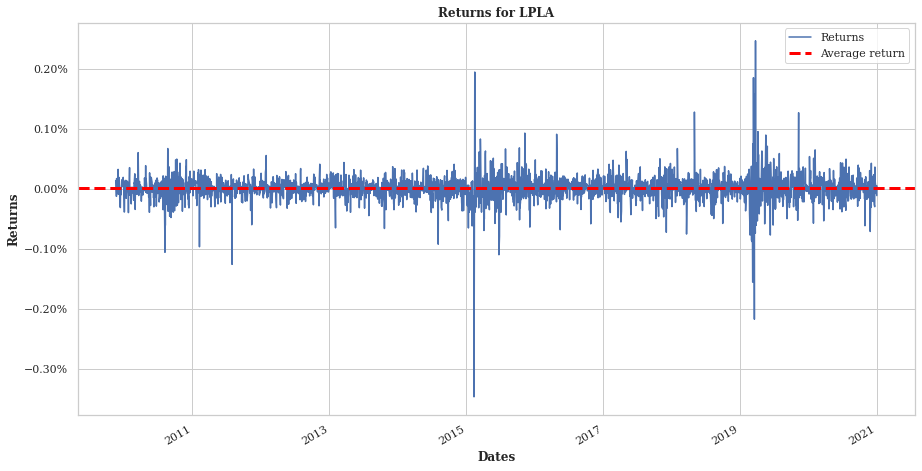

In [5]:
sf.plot_returns(returns, ticker)

## 3. Estimation of the VaR

### a. Non parametric method

We are computing the VaR using the non parametric method called Exponentially Weighted Historical Simulation (EWHS) with a rolling window. In order to proceed we use the function weighted_hs_var in the Series_Functions package.

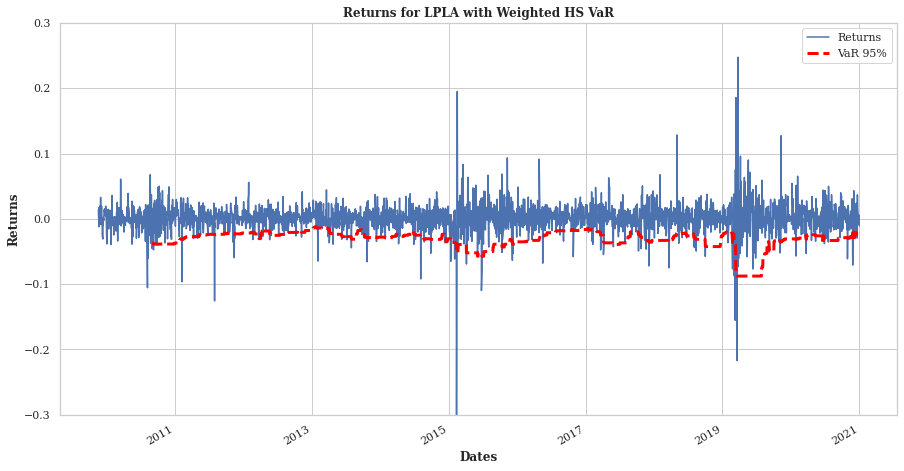

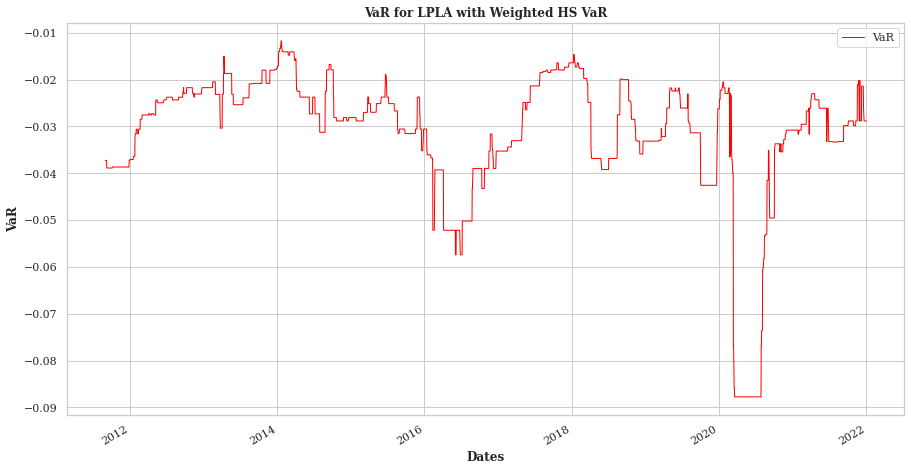

In [6]:
VaR_NonParam = sf.weighted_hs_var(returns=returns,confidence_level=95,window=100,ticker=ticker)

If we are using a bigger window, the VaR will be more and more smoothed and constant.

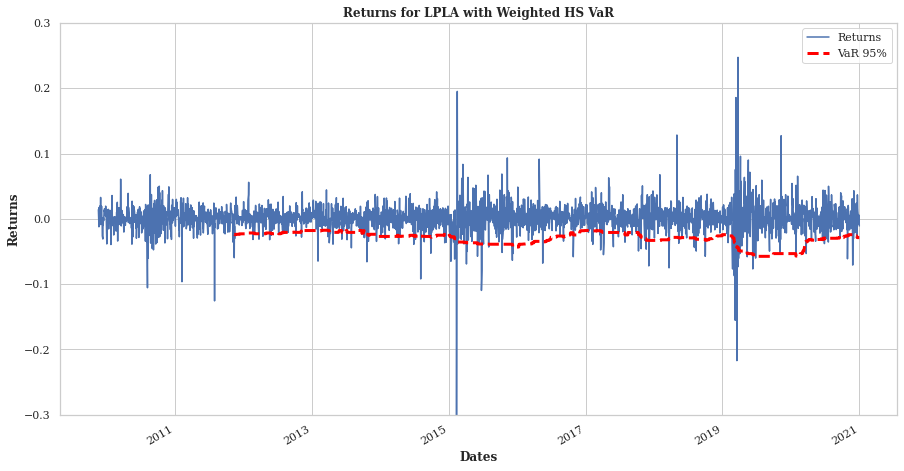

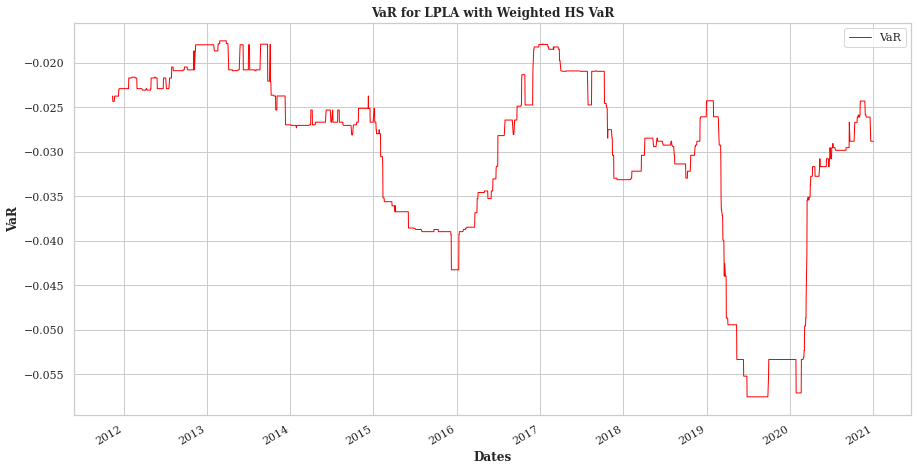

In [41]:
VaR_NonParam = sf.weighted_hs_var(returns=returns,confidence_level=99,window=500,ticker=ticker)

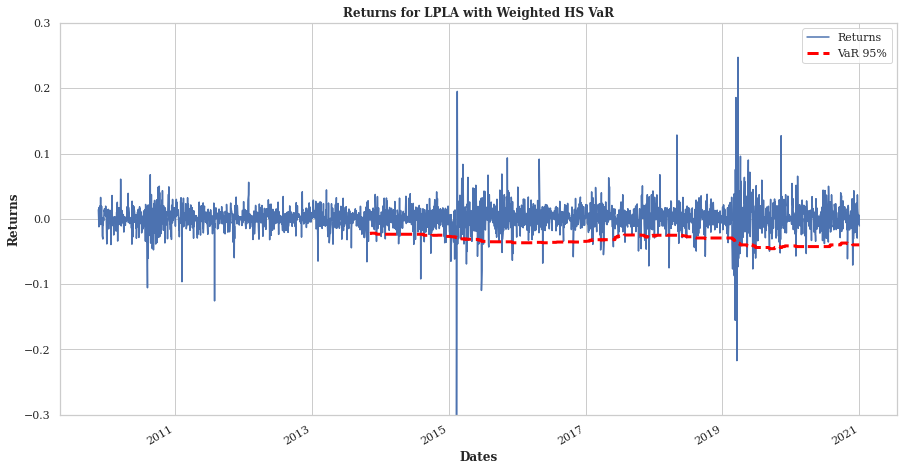

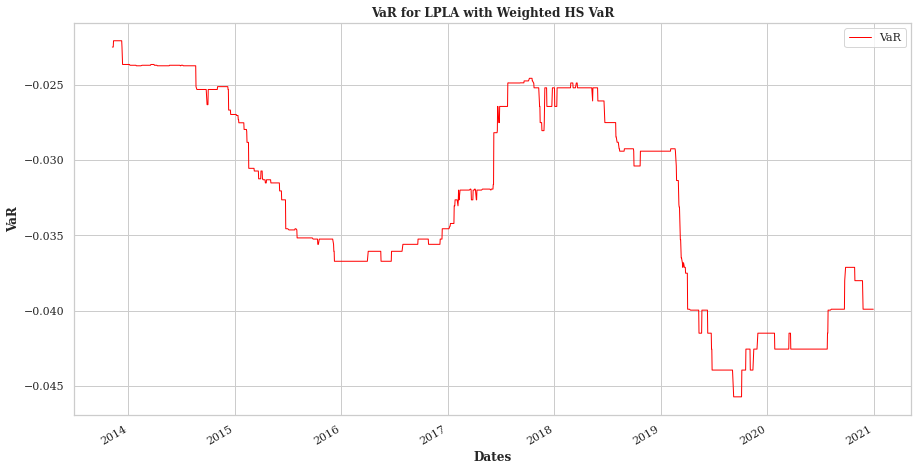

In [42]:
VaR_NonParam = sf.weighted_hs_var(returns=returns,confidence_level=99,window=750,ticker=ticker)

### b. Parametric method

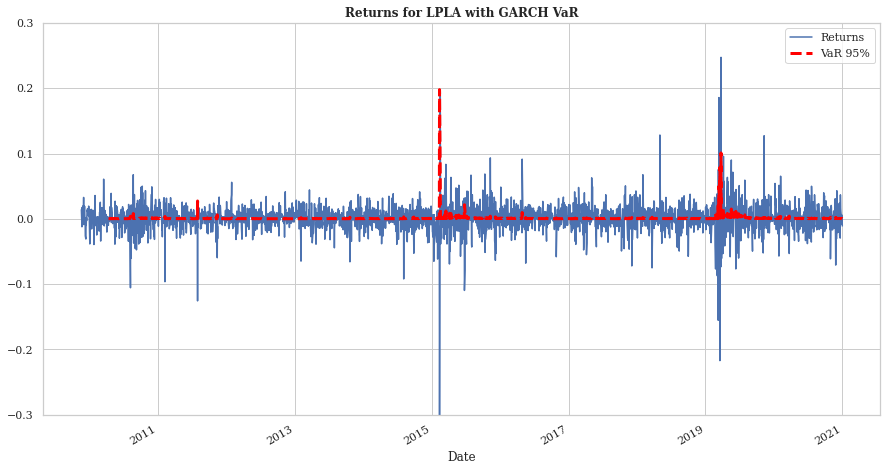

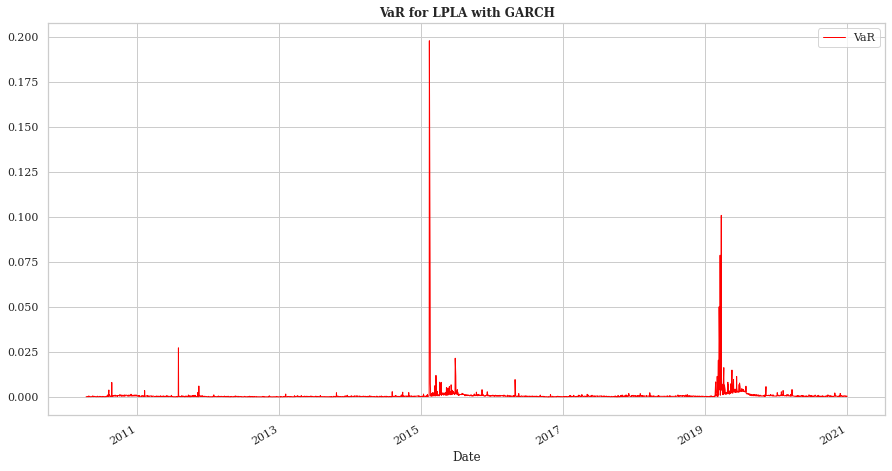

In [9]:
p,q = sf.optimize_garch(returns=returns, bounds=[9,9])
VaR_Param = sf.garch_var(returns=returns, confidence_level=95, p=p, q=q, ticker=ticker)

## Expected shortfall

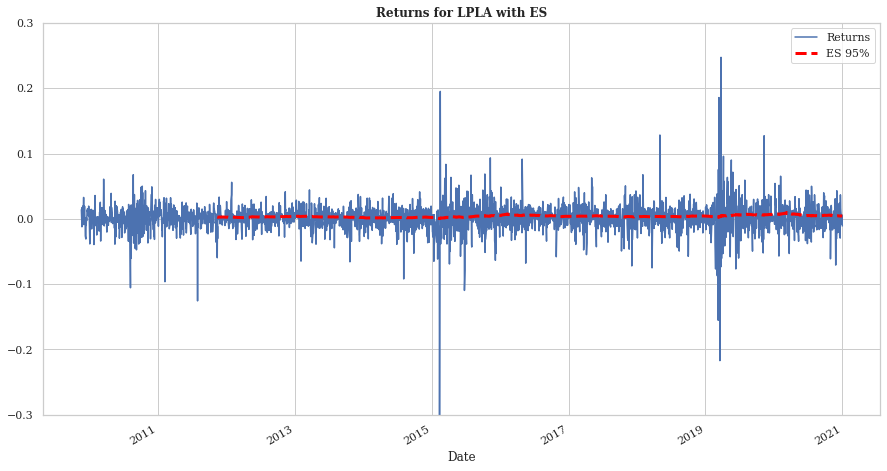

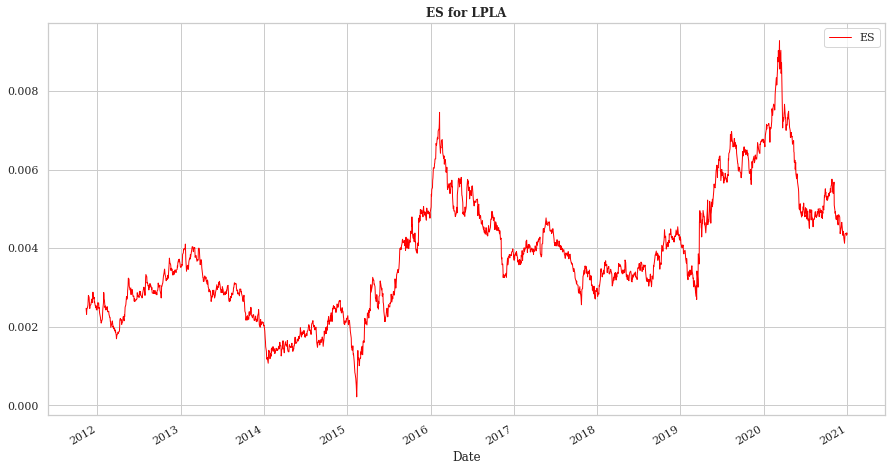

In [10]:
Es = sf.expected_shortfall(returns=returns, confidence_level=95, window=250, ticker=ticker)